In [2]:
import pandas as pd
import statsmodels.formula.api as smf 
import statsmodels.api as sm  
import seaborn as sns
import matplotlib.pyplot as plt 
import datetime as dt
import numpy as np

In [3]:
df = pd.read_csv('../data/hospitalisations.csv')


df["Date d'admission"] = pd.to_datetime(df["Date d'admission"])
df['total'] = df["Hors soins intensifs"] + df['Aux soins intensifs']
df['MA'] = df['total'].rolling(window=4).mean()
df.head(20)

,Date d'admission,Hors soins intensifs,Aux soins intensifs,total,MA
0,2020-02-24,3,1,4,NaN
1,2020-02-25,1,1,2,NaN
2,2020-02-26,2,1,3,NaN
3,2020-02-27,1,0,1,2.50
4,2020-02-28,1,1,2,2.00
5,2020-02-29,3,2,5,2.75
6,2020-03-01,2,1,3,2.75
7,2020-03-02,1,0,1,2.75
8,2020-03-03,0,1,1,2.50
9,2020-03-04,2,0,2,1.75


In [4]:
import plotly.express as px 
import plotly.graph_objs as go
import plotly.graph_objs as go 


fig = px.line(df, x = "Date d'admission", y= 'MA',
              hover_data={"Date d'admission" : "|%Y %m, %d"},
              title='Hospitalization cases since March 2020')

fig.add_vline(x='2020-03-20', line_width=3, line_dash="dash", line_color="green")
fig.add_vline(x='2020-08-31', line_width=3, line_dash="dash", line_color="green")
fig.add_vline(x='2020-12-25', line_width=3, line_dash="dash", line_color="green")

fig.update_xaxes(
    dtick='M1',
    tickformat="%b\n%Y"
)
fig.show()


In [5]:
start_date = '2020-12-06'
end_date = '2021-01-13'

#mask for The 25/12/2020 lockdown
lockdown_2 = (df["Date d'admission"]  > start_date) & (df["Date d'admission"]  < end_date)

df_lockdown_2 = df.loc[lockdown_2]
#centralize the running variable date d'admission at 2020-12-25
#df_lockdown_2["Date d'admission"] = "2020-12-25"

df_lockdown_2.reset_index(drop=True, inplace=True)
df_lockdown_2.set_index(df_lockdown_2.index)
df_lockdown_2['x1'] = df_lockdown_2.index
#df_lockdown_2.set_index(df_lockdown_2.x1)
df_lockdown_2


,Date d'admission,Hors soins intensifs,Aux soins intensifs,total,MA,x1
0,2020-12-07,68,13,81,79.75,0
1,2020-12-08,86,13,99,84.25,1
2,2020-12-09,86,12,98,87.50,2
3,2020-12-10,79,15,94,93.00,3
4,2020-12-11,89,10,99,97.50,4
5,2020-12-12,83,12,95,96.50,5
6,2020-12-13,91,8,99,96.75,6
7,2020-12-14,93,18,111,101.00,7
8,2020-12-15,105,14,119,106.00,8
9,2020-12-16,92,10,102,107.75,9


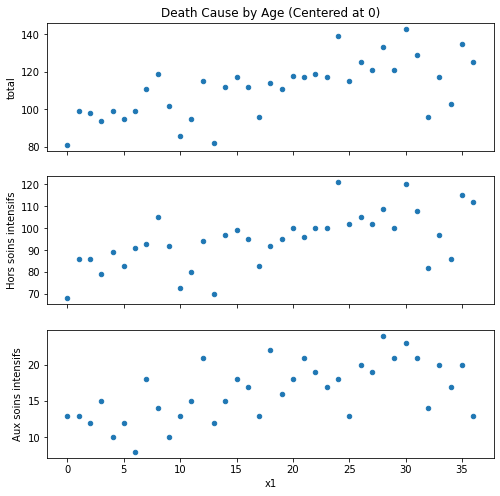

In [6]:
plt.figure(figsize=(8,8))
ax = plt.subplot(3,1,1)
df_lockdown_2.plot.scatter(x='x1', y="total", ax=ax)
plt.title("Death Cause by Age (Centered at 0)")
#xvline = '2020-12-25'
ax = plt.subplot(3,1,2, sharex=ax)
df_lockdown_2.plot.scatter(x='x1', y="Hors soins intensifs", ax=ax)

ax = plt.subplot(3,1,3, sharex=ax)
df_lockdown_2.plot.scatter(x='x1', y="Aux soins intensifs", ax=ax);

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     15.19
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           2.21e-06
Time:                        15:19:40   Log-Likelihood:                -140.61
No. Observations:                  37   AIC:                             289.2
Df Residuals:                      33   BIC:                             295.7
Df Model:                           3                                         
Covariance Type:                  HC2                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               93.4654      3.858  

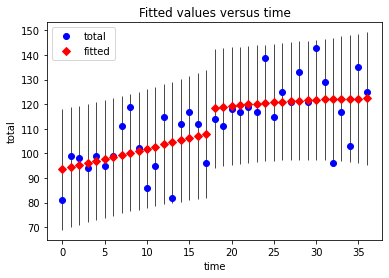

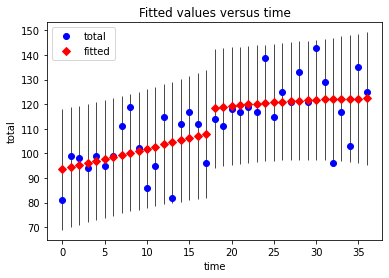

In [7]:
df_lockdown_2['Group'] = np.where(df_lockdown_2["Date d'admission"] >= '2020-12-25', "After", "Before")

y = df_lockdown_2.total

x = pd.DataFrame(sm.add_constant(df_lockdown_2.index.astype(int)))

x.columns = ['const', 'time']

x['cutoff'] = (df_lockdown_2["Group"] == 'After').astype(int)

x['cutoffslope_poly'] = x['cutoff'] * x.time * x.time #poly fit on the right side
#x['time2'] = x.time ** 2

re = sm.OLS(y,x).fit(cov_type="HC2")
print(re.summary())

sm.graphics.plot_fit(re, 'time') #time is equal to x axis



                             OLS Regression Results                             
Dep. Variable:     Hors soins intensifs   R-squared:                       0.406
Model:                              OLS   Adj. R-squared:                  0.371
Method:                   Least Squares   F-statistic:                     10.75
Date:                  Sat, 23 Jan 2021   Prob (F-statistic):           0.000241
Time:                          11:39:47   Log-Likelihood:                -136.60
No. Observations:                    37   AIC:                             279.2
Df Residuals:                        34   BIC:                             284.0
Df Model:                             2                                         
Covariance Type:                    HC2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.1697      3.298

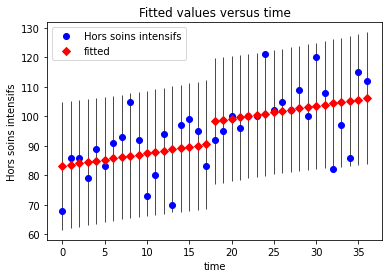

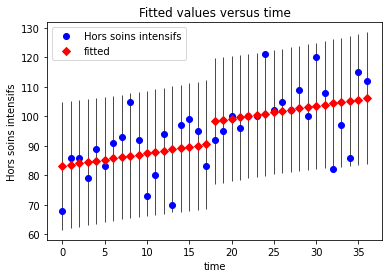

In [58]:
y = df_lockdown_2["Hors soins intensifs"]

x = pd.DataFrame(sm.add_constant(df_lockdown_2.index.astype(int)))

x.columns = ['const', 'time']

x['cutoff'] = (df_lockdown_2["Group"] == 'After').astype(int)

#x['cutoffslope_poly'] = x['cutoff'] * x.time * x.time #poly fit on the right side
#x['time2'] = x.time ** 2

re = sm.OLS(y,x).fit(cov_type="HC2")
print(re.summary())

sm.graphics.plot_fit(re, 'time') #time is equal to x axis

                             OLS Regression Results                            
Dep. Variable:     Aux soins intensifs   R-squared:                       0.444
Model:                             OLS   Adj. R-squared:                  0.375
Method:                  Least Squares   F-statistic:                     9.301
Date:                 Mon, 25 Jan 2021   Prob (F-statistic):           4.19e-05
Time:                         15:28:29   Log-Likelihood:                -92.502
No. Observations:                   37   AIC:                             195.0
Df Residuals:                       32   BIC:                             203.1
Df Model:                            4                                         
Covariance Type:                   HC2                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               11.7466   

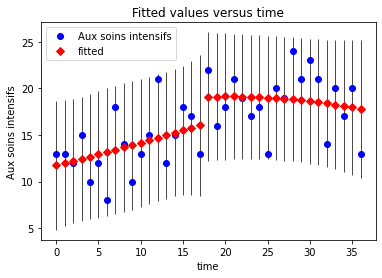

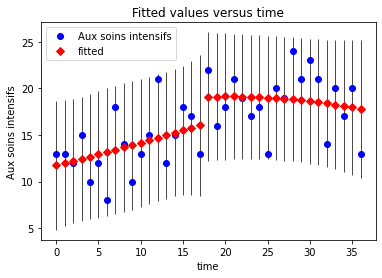

In [20]:
y = df_lockdown_2["Aux soins intensifs"]

x = pd.DataFrame(sm.add_constant(df_lockdown_2.index.astype(int)))

x.columns = ['const', 'time']

x['cutoff'] = (df_lockdown_2["Group"] == 'After').astype(int)

x['cutoffslope_poly'] = x['cutoff'] * x.time * x.time #poly fit on the right side
x['time2'] = x.time ** 2
#print(x)
re = sm.OLS(y,x).fit(cov_type="HC2")
print(re.summary())



sm.graphics.plot_fit(re, 'time') #time is equal to x axis


### Amount of time before cutoff: I have 18 points before and 19 after. 

I decided to plot the RDD for the total of hospitalization, the one "Aux soins intensifs", and the one "Hors soins intensifs". 

### Polynomial used: 

I didn't use the Polynomial for the total and "hors soins intensifs", because it was overfitting the model with it and plot wasn't reprentative of the situation. 
The R-squared aren't high we have 0.479 & 0.406 for those 2 models. 


However, for the "Aux soins intensifs", I've added polynomials on the time. The result were well fitted, we can see after december 25th we can see the hospitalization slighlty going down at the end. 

### Explanation of findings: 

I've made a couple of experimentation with my data and I notice that 2 models out of 3 were performing better with a squared polynomial on the cutoff slope. I realize that it was getting a better result since we notice a slowdown in term of hospitalization after the second lockdown, which is the case. 


Running the model without a polynomial made the regression looks constant on both side which didn't happen in reality. You will also understand that with a degree of polynomial fitted in the model, the model was overfitted and wasn't reflecting at all the situation. 

The only case were the the degree of polynomial gave a good fit was in the model with the data from the "aux soins intensifs". 